In [1]:
import pickle
import numpy as np
from multiprocessing import Pool
import requests, json
import pandas as pd
import glob
import timeit
import time
from multiprocessing import Pool
import numpy as np

def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    

from zipfile import ZipFile
import re
import xmlschema
from pprint import pprint
import glob
# importing element tree
import lxml.etree as etree
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=ff-4)
    plt.yticks(fontsize=ff-4)



In [2]:
# import os
# os.getcwd()
path_data="/mnt/sdb1/sandeep/"
path_career=path_data

In [3]:
# # work_=df_ref_grouped.index[x]
# url='https://api.openalex.org/works?filter=cites:'+work_
# headers = {
#     'User-Agent': 'chowdhary_sandeep',
#     'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
# }
# response = requests.get(url, headers=headers)
# response.raise_for_status()  # raises exception when not a 2xx response
# response=response.json()
# print(response['meta']['count'])

def get_citers(work_):

    url='https://api.openalex.org/works?filter=cites:'+work_
    headers = {
        'User-Agent': 'chowdhary_sandeep',
        'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
    }


    new_url__=url

    # get first page

    cursor='*'
    works_=[]
    try:
        response = requests.get(new_url__+'&per-page=200&cursor='+cursor,headers=headers)
        response.raise_for_status()  # raises exception when not a 2xx response
    except:
        response = requests.get(new_url__+'&per-page=50&cursor='+cursor,headers=headers)
        response.raise_for_status()  # raises exception when not a 2xx response

    if response.status_code != 204:
        res= response.json()
        LL=res['meta']['count']
        works_.append(res)
        it=0

        # get all other pages
        while not(res['meta']['next_cursor'] is None):
            it+=1
            print(it*200/LL,end='\r')
            cursor=res['meta']['next_cursor']
            try:
                response = requests.get(new_url__+'&per-page=200&cursor='+cursor,headers=headers)
                response.raise_for_status()  # raises exception when not a 2xx response

            except:
                response = requests.get(new_url__+'&per-page=50&cursor='+cursor,headers=headers)
                response.raise_for_status()  # raises exception when not a 2xx response
            if response.status_code != 204:
#                             res= response.json()                            
                res = json.loads(response.content.decode("utf-8"))

                if len(res['results'])>0:
                    works_.append(res)

        career_=[]
        for it in range(len(works_)):
            career_=career_+(works_[it]['results'])
        return career_
    else:
        return 'NA'


# Loading paper-author data

In [3]:
# # # 
start_time = timeit.default_timer()
# names=path_data+'openalex_ACTIV/paper_author/pa*'
names=path_data+'openalex_ACTIV/paper_author_wc10_400/pa*'
files=sorted(glob.glob(names))

p=Pool(processes=15)
df = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
p.close()
print(toc(start_time))

185.8905479758978
None
185.89127539098263
None


In [4]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

#swap points and rebounds columns
df = swap_columns(df, 'auth_id','paper_id')

In [ ]:
# df=df[['auth_id','paper_id']]
# df = df.drop_duplicates()
# print(1)

In [5]:
df.columns=['a','b']

In [ ]:
# print(2)
# # selecting papers with less than = 10 authors
# selcted_b=XX[XX['a']<10]
# df=df.loc[df['b'].isin(np.array(selcted_b.index))]
# df=df.sort_values(['b'])

In [ ]:
# authors with less than 1000 papers 
#and atleast 10 papers
print(2)
XX=df.groupby(['b']).count()

# selecting papers with less than = 10 authors
selcted_b=XX[XX['a']<10]
df=df.loc[df['b'].isin(np.array(selcted_b.index))]
df=df.sort_values(['b'])
YY=df.groupby(['a']).count()
selcted_b=YY[YY['b']<1000]
selcted_b=selcted_b[selcted_b['b']>9]
df=df.loc[df['a'].isin(np.array(selcted_b.index))]
print(4)
# df=df.sort_values(['b'])

2


# Make igraph
calculate the possible papers each author could have participated in theoretically

In [ ]:
el=df[['a','b']].values
# el_new=[]
# for x in el:
#     el_new.append([x[0],x[1]])
uni_nodes=np.unique(el.flatten())

dict_auth_shortened={uni_nodes[it]:it for it in range(len(uni_nodes))}
el_new_new=np.vectorize(dict_auth_shortened.get)(el)
el_new3=[]
for x in el_new_new:
    el_new3.append(tuple(x))


In [ ]:
# auth_inv_map={dict_auth_shortened[key]:key for key in dict_auth_shortened.keys()}
# path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

# import pickle
# with open(path_career+'auth_inv_map_alex.pkl', 'wb') as f:
#     pickle.dump(auth_inv_map, f)    


In [7]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'auth_inv_map_alex.pkl', 'rb') as f:
    auth_inv_map=pickle.load(f) 


In [19]:
import igraph as ig
g = ig.Graph()
g.add_vertices(len(uni_nodes))
g.add_edges(el_new3)

In [20]:
def get_N_order_3and5(auth,g):
#     a=g.neighborhood(auth,order=5,mindist=5)
    b=g.neighborhood(auth,order=3,mindist=3)
    c=g.neighborhood(auth,order=1,mindist=1)
    
#     return len(set(b+c)),len(set(a+b+c))
    return len(set(b+c))

In [21]:
# CREATE DICTIONARY WITH JUST COUNTS OF PAPERS AT LEVEL 5 and 3

In [ ]:
import time
uni_auths=np.unique(np.array(df['a']))
uni_pap=np.unique(np.array(df['b']))
# SET_uni_auths=set(uni_auths)
it=0
dict_auth_ss={uni_auths[it]:it for it in range(len(uni_auths))}
dict_papers_ss={uni_pap[it]:it for it in range(len(uni_pap))}
t_ic = time.time();

# dict_auth_N_ord5={}


In [ ]:
dict_auth_N_ord3={}
for auth in uni_auths:
    
    x3=get_N_order_3and5(dict_auth_shortened[auth],g);
    dict_auth_N_ord3[auth]=x3
#     dict_auth_N_ord5[auth]=x5

    it=it+1
    if it%1000==0:
        t_oc = time.time();
        progress_=str(it/len(uni_auths))+','+str(round(t_oc-t_ic,2))+', '+str((t_oc-t_ic)/(it/len(uni_auths))/3600)
        print(progress_,end='\r')
        with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_open_alex1.txt", "a") as file_object:
            file_object.write(progress_+'\n')


In [ ]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_open_alex1.txt", "a") as file_object:
    file_object.write('\n --- WRITING TO PICKLE---\n')
import pickle
with open(path_career+'dict_auth_N_ord3_alex.pkl', 'wb') as f:
    pickle.dump(dict_auth_N_ord3, f)    

with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_open_alex1.txt", "a") as file_object:
    file_object.write('\n --- DONE ---WRITING TO PICKLE---\n')
        
# with open(path_career+'dict_auth_papers_order_5.pkl', 'rb') as f:
#     dict_auth_papers_order_5=pickle.load(f)    

    

In [13]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'dict_auth_N_ord3_alex.pkl', 'rb') as f:
    dict_auth_N_ord3=pickle.load(f) 


In [10]:

import sys
sys.getsizeof(dict_auth_N_ord3)/10**6

335.544408

In [ ]:
# dict_auth_N_ord3['https://openalex.org/A1034537070']

In [ ]:
len(dict_auth_N_ord3)
# 6728791

In [ ]:
df['a'].nunique()

In [ ]:
1

In [ ]:
print(1)

# Run svs

In [ ]:
start_time = timeit.default_timer()
from svs import *
significant_cores3,nonsignificant_cores3=get_svs(df[['a','b']],dict_auth_N_ord3,min_order=2,max_order=0,approximate=True)
# all_cores5=get_svs(df[['a','b']],dict_auth_N_ord5,min_order=2,max_order=0,approximate=True)
print('Time elasped=',toc(start_time))    
        

In [ ]:
significant_cores3

In [ ]:
with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_open_alex1.txt", "a") as file_object:
    file_object.write('\n --- DONE ---svs ---\n')
        

In [ ]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_openalex_writing.txt", "a") as file_object:
    file_object.write('\n --- WRITING TO PICKLE---\n')

with open(path_career+'cores3s_alex_big.pkl', 'wb') as f:
    pickle.dump(significant_cores3, f)  
with open(path_career+'cores3ns_alex_big.pkl', 'wb') as f:
    pickle.dump(nonsignificant_cores3, f)  
    
# with open(path_career+'all_cores5.pkl', 'wb') as f:
#     pickle.dump(all_cores5, f)  

with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_openalex_writing.txt", "a") as file_object:
    file_object.write('\n --- DONE ---WRITING TO PICKLE---\n')

In [ ]:
# path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
# with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_open_alex1.txt", "a") as file_object:
#     file_object.write('\n --- WRITING TO PICKLE---\n')

# with open(path_career+'all_cores3_alex_big.pkl', 'wb') as f:
#     pickle.dump(all_cores3, f)  
    
# # with open(path_career+'all_cores5.pkl', 'wb') as f:
# #     pickle.dump(all_cores5, f)  

# with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_open_alex1.txt", "a") as file_object:
#     file_object.write('\n --- DONE ---WRITING TO PICKLE---\n')

# Load all_cores3

In [ ]:
# path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
# with open(path_career+'all_cores3_alex_big.pkl', 'rb') as f:
#     all_cores3=pickle.load(f) 


In [ ]:
# significant_cores3=all_cores3.query('fdr')
# #Using variable
# value=False
# nonsignificant_cores3=all_cores3.query('fdr== @value')

## Validated vs Non-Validated

In [ ]:
import time

it=0
t_ic = time.time();

# auth_inv_map={dict_auth_shortened[key]:key for key in dict_auth_shortened.keys()}
papers_shared=[]
for group in significant_cores3['group']:
    x=[]
    for auth in group:
        x.append(g.neighborhood(dict_auth_shortened[auth],order=1,mindist=1))
        y=x[0]
        for it1 in range(1,len(x)-1):
            y=list(set(y) & set(x[it1]))
    
    papers_shared.append(y)
    it=it+1
    if it%100==0:
        t_oc = time.time();
        print(it, '---- ',it/len(significant_cores3['group']),str(round(t_oc-t_ic,2)),end='\r')
        with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_paper_000.txt", "a") as file_object:
            file_object.write(str(it/len(significant_cores3['group']))+'----i.e.----'+str(it)+' -out-of-'+str(len(significant_cores3['group']))+'----time taken-'+str(round(t_oc-t_ic,2))+'\n')

            
significant_cores__papers_shared=papers_shared.copy()
with open(path_career+'significant_cores__papers_shared.pkl', 'wb') as f:
    pickle.dump(significant_cores__papers_shared, f)  

# path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
# with open(path_career+'significant_cores__papers_shared.pkl', 'rb') as f:
#     significant_cores__papers_shared=pickle.load(f) 



In [ ]:
it=0
t_ic = time.time();
papers_shared=[]

for group in nonsignificant_cores3['group']:
    x=[]
    for auth in group:
        x.append(g.neighborhood(dict_auth_shortened[auth],order=1,mindist=1))
        y=x[0]
        for it1 in range(1,len(x)-1):
            y=list(set(y) & set(x[it1]))
    
    papers_shared.append(y)
    it=it+1
    if it%100==0:
        t_oc = time.time();
        print(it, '---- ',it/len(nonsignificant_cores3['group']),str(round(t_oc-t_ic,2)),end='\r')
        with open("/mnt/sdb1/sandeep/openalex_ACTIV/0_track_paper_000.txt", "a") as file_object:
            file_object.write(str(it/len(nonsignificant_cores3['group']))+'----i.e.----'+str(it)+' -out-of-'+str(len(nonsignificant_cores3['group']))+'----time taken-'+str(round(t_oc-t_ic,2))+'\n')
nonsignificant_cores__papers_shared=papers_shared.copy()
with open(path_career+'nonsignificant_cores__papers_shared.pkl', 'wb') as f:
    pickle.dump(nonsignificant_cores__papers_shared, f)  


In [ ]:
1

### distrbution 'w' : valid vs non-valid

In [ ]:

w3=np.array(significant_cores3['w'])
w3non=np.array(nonsignificant_cores3['w'])
gs3=np.array([len(x) for x in np.array(significant_cores3['group'])])
gs3non=np.array([len(x) for x in np.array(nonsignificant_cores3['group'])])


In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(0,figsize=(9, 4.5));
for gs in range(2,10):
    ind_selct3=np.where(gs3==gs);
    ind_selct3non=np.where(gs3non==gs);



    ax = fig.add_subplot(2, 4, gs-1);
    
    #     bins_=(max(store_transition1)-min(store_transition1))+1

    ax.hist(w3[ind_selct3],bins=30,color='red',density=False,alpha=0.5,label='Validated cores');
    ax.hist(w3non[ind_selct3non],bins=30,color='blue',density=False,alpha=0.5,label='Non-validated cores');
    ax.set_yscale('log');
    ff=10
    # ax.set_xscale('log',base=2);
    ax.set_xlim([-10,500])
    ax.set_xticks([0,100,200,300,400])
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    if gs==2 or gs==6:
        ax.set_ylabel('Frequency (w)',fontsize=ff)
    ax.set_title('groupsize='+str(gs),fontsize=ff)
    if gs>5:
        ax.set_xlabel('# shared papers, w',fontsize=ff);
    ax.tick_params(axis='both', which='major', labelsize=8)
    
ax.legend(fontsize=ff-2,bbox_to_anchor=(.1,0.5))
plt.tight_layout()

### percentile shared papers > 10 

In [62]:

# w3=np.array(significant_cores3['w'])
# w3non=np.array(nonsignificant_cores3['w'])
# gs3=np.array([len(x) for x in np.array(significant_cores3['group'])])
# gs3non=np.array([len(x) for x in np.array(nonsignificant_cores3['group'])])

# percentile5=[]
# percentile10=[]
# percentile15=[]
# for gs in range(2,10):
#     percentile5.append(len(np.where(((gs3==gs) & (w3>=5)))[0])/len(np.where((gs3==gs))[0] ))
#     percentile10.append(len(np.where(((gs3==gs) & (w3>=10)))[0])/len(np.where((gs3==gs))[0] ))
#     percentile15.append(len(np.where(((gs3==gs) & (w3>=15)))[0])/len(np.where((gs3==gs))[0] ))

# #     ind_selct3non=np.where((gs3non==gs) and ());
# #     w3non[ind_selct3non]


In [ ]:
fig = plt.figure(0,figsize=(4, 2.5));
ax = fig.add_subplot(1, 1, 1);
ax.bar(np.array(range(2,10))-.2,percentile5,label='$n_{papers}^{filter} \geq$ 5',alpha=.5,width=.2);
ax.bar(np.array(range(2,10)),percentile10,label='$n_{papers}^{filter} \geq$ 10',alpha=.5,width=.2);
ax.bar(np.array(range(2,10))+.2,percentile15,label='$n_{papers}^{filter} \geq$ 15',alpha=.5,width=.2);
ff=10
# ax.set_xscale('log',base=2);
# ax.set_xlim([-10,500])
ax.set_xticks(range(2,10))
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

ax.set_title('percentile of validated cores after filter',fontsize=ff)
ax.set_xlabel('core size',fontsize=ff)
# ax.set_xlabel('# shared papers, w',fontsize=ff);
ax.tick_params(axis='both', which='major', labelsize=8)

ax.legend(fontsize=ff,bbox_to_anchor=(1,0.5),frameon=False)


# Load all_cores3

In [8]:
# path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
# with open(path_career+'all_cores3_alex.pkl', 'rb') as f:
#     all_cores3=pickle.load(f) 


In [9]:
# significant_cores3=all_cores3.query('fdr')
# #Using variable
# value=False
# nonsignificant_cores3=all_cores3.query('fdr== @value')

# Load papers shared by cores 
into (non) singificant cores3 dataframes

In [10]:
# path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
# with open(path_career+'significant_cores__papers_shared.pkl', 'rb') as f:
#     significant_cores__papers_shared=pickle.load(f) 

# with open(path_career+'nonsignificant_cores__papers_shared.pkl', 'rb') as f:
#     nonsignificant_cores__papers_shared=pickle.load(f) 



In [11]:
# significant_cores3['papers_shared']=[[auth_inv_map[x] for x in lis] for lis in significant_cores__papers_shared]
# nonsignificant_cores3['papers_shared']=[[auth_inv_map[x] for x in lis] for lis in nonsignificant_cores__papers_shared]

# with open(path_career+'significant_cores3_alex.pkl', 'wb') as f:
#     pickle.dump(significant_cores3, f)  
# with open(path_career+'nonsignificant_cores3_alex.pkl', 'wb') as f:
#     pickle.dump(nonsignificant_cores3, f)  


<ipython-input-11-94e7c7fc7fbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_cores3['papers_shared']=[[auth_inv_map[x] for x in lis] for lis in significant_cores__papers_shared]
<ipython-input-11-94e7c7fc7fbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonsignificant_cores3['papers_shared']=[[auth_inv_map[x] for x in lis] for lis in nonsignificant_cores__papers_shared]


In [11]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'significant_cores3_alex.pkl', 'rb') as f:
    significant_cores3=pickle.load(f) 
with open(path_career+'nonsignificant_cores3_alex.pkl', 'rb') as f:
    nonsignificant_cores3=pickle.load(f) 

In [116]:
PAPERS_TOGETHER=5
significant_cores3_sample=significant_cores3[significant_cores3['w']>PAPERS_TOGETHER]
nonsignificant_cores3_sample=nonsignificant_cores3.sample(n=significant_cores3_sample.shape[0], random_state=12)



### Unique papers by persisitent teams

In [13]:
ups=[]
for x in significant_cores3_sample['papers_shared']:
    ups+=x
ups=np.unique(ups)

### Unique papers by non-persisitent teams

In [14]:
upns=[]
for x in nonsignificant_cores3_sample['papers_shared']:
    upns+=x
upns=np.unique(upns)

# Loading citations

In [6]:
# # # 
start_time = timeit.default_timer()
names=path_data+'openalex_ACTIV/paper_citations/paper_citations0000000*'
files=sorted(glob.glob(names))

p=Pool(processes=12)
df_citations = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
# names_par="/mnt/sdb1/sandeep/open_alex_ACTIV/df_paper_auth.parquet"
# df.to_parquet(names_par,index=None)

p.close()
print(toc(start_time))

34.98414358869195
None
34.98686636611819
None


In [29]:
df_citations

,paper_id,n_citations,pub_date
0,https://openalex.org/W2170864075,22,2011-04-12
1,https://openalex.org/W2121653161,36,2016-06-01
2,https://openalex.org/W1577700235,28,2015-07-04
3,https://openalex.org/W2131026852,88,2014-06-11
4,https://openalex.org/W2017795014,15,2006-11-27
...,...,...,...
77093472,https://openalex.org/W2502207778,9,1998-01-01
77093473,https://openalex.org/W2231654345,9,1998-01-01
77093474,https://openalex.org/W4244331995,9,1998-01-01
77093475,https://openalex.org/W1787257657,9,1998-01-01


In [77]:
df_citations['paper_id']=[x[3] for x in list(df_citations['paper_id'].str.split('/'))]

## pub_date to datetime format

In [151]:

paper_id=[];pub_year=[];pub_mon=[];
it=0
for p,x in zip(df_citations['paper_id'],df_citations['pub_date']):
    it+=1
    try:
        pub_year.append(int(x.split('-')[0]))
        pub_mon.append(int(x.split('-')[1]))
        paper_id.append(p)
    except:
        1
    if it%1000==0:
        print(it/len(df_citations['pub_date']),end='\r')
        

pub_year=np.array(pub_year)
pub_mon=np.array(pub_mon)
pub_date=np.array(pub_year)+np.array(pub_mon/12)
# df_citations['pub_date']=pub_date

# Career age calculation
creating a dictionary - {auth:first_pub_date}

In [3]:
# # # 
start_time = timeit.default_timer()
names=path_data+'openalex_ACTIV/pa_workcount10/*'
files=sorted(glob.glob(names))

p=Pool(processes=15)
df_age = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
# names_par="/mnt/sdb1/sandeep/open_alex_ACTIV/df_paper_auth.parquet"
# df.to_parquet(names_par,index=None)

p.close()
print(toc(start_time))

67.37633738294244
None
67.37887931615114
None


In [4]:
paper_id=[];pub_year=[];pub_mon=[];
it=0
for p,x in zip(df_age['paper_id'],df_age['pub_date']):
    it+=1
    try:
        pub_year.append(int(x.split('-')[0]))
        pub_mon.append(int(x.split('-')[1]))
        paper_id.append(p)
    except:
        1
    if it%1000==0:
        print(it/len(df_age['pub_date']),end='\r')
        

pub_year=np.array(pub_year)
pub_mon=np.array(pub_mon)
pub_date=np.array(pub_year)+np.array(pub_mon/12)
dict_pubdate={p:d for p,d in zip(paper_id,pub_date)}

In [28]:
dict_date=df_age.iloc[:,[0,1]].set_index('paper_id')['pub_date'].T.to_dict()

In [5]:
df_age['pub_date']=df_age['paper_id'].map(dict_pubdate)

In [7]:
df_age_min=df_age.groupby(['auth_id']).min()

In [8]:
df_age_min['pub_date']

auth_id
https://openalex.org/A1000009205    2007.833333
https://openalex.org/A100000977     2001.666667
https://openalex.org/A1000019120    2013.083333
https://openalex.org/A100002621     2008.583333
https://openalex.org/A1000041814    2016.083333
                                       ...     
https://openalex.org/A999946774     2002.083333
https://openalex.org/A999958696     2008.916667
https://openalex.org/A99998294      2011.166667
https://openalex.org/A999983147     2012.916667
https://openalex.org/A99998617      2012.583333
Name: pub_date, Length: 10295580, dtype: float64

In [17]:
dict_first_pub=df_age_min['pub_date'].T.to_dict()

In [18]:
# path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'

# import pickle
# with open(path_career+'dict_first_pub.pkl', 'wb') as f:
#     pickle.dump(dict_first_pub, f) 
# with open(path_career+'dict_date.pkl', 'wb') as f:
#     pickle.dump(dict_date, f) 


## How many citations per paper? 
And when were they published?

In [152]:
dict_cites={x:y for x,y in zip(df_citations['paper_id'],df_citations['n_citations'])}
dict_dates={x:y for x,y in zip(paper_id,pub_date)}


In [ ]:
### Setting 

In [158]:
citations=[];it=0
years=[];

for papers in significant_cores3['papers_shared']:
    it+=1
    citations.append([dict_cites[p] if p in dict_cites.keys() else np.Nan for p in papers])
    years.append([dict_dates[p] if p in dict_cites.keys() else np.Nan for p in papers])
    if it%1000==0:
        print(it/len(significant_cores3['papers_shared']),end='\r')
significant_cores3['citations']=citations
significant_cores3['years']=years

In [198]:
nonsignificant_cores3_sample=nonsignificant_cores3.sample(n=significant_cores3.shape[0], random_state=1)
citations=[];it=0
years=[];
for papers in nonsignificant_cores3_sample['papers_shared']:
    it+=1
    citations.append([dict_cites[p] if p in dict_cites.keys() else np.Nan for p in papers])
    years.append([dict_dates[p] if p in dict_cites.keys() else np.Nan for p in papers])
    if it%1000==0:
        print(it/len(nonsignificant_cores3_sample['papers_shared']),end='\r')
nonsignificant_cores3_sample['citations']=citations
nonsignificant_cores3_sample['years']=years

In [18]:
nature_others_works[venue]

4869892

In [30]:
ups_cites=np.array([dict_cites[p] if p in dict_cites.keys() else np.Nan for p in ups])
upns_cites=np.array([dict_cites[p] if p in dict_cites.keys() else np.Nan for p in upns])

In [ ]:
ups_dates=np.array([dict_dates[p] if p in dict_dates.keys() else np.Nan for p in ups])
upns_dates=np.array([dict_dates[p] if p in dict_dates.keys() else np.Nan for p in upns])

#### relative succes of papers by publication year

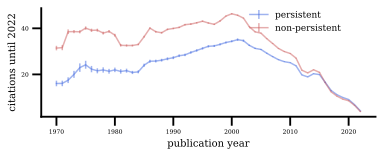

In [271]:
yi=1970;yf=2022;years=list(np.linspace(yi,yf,yf-yi+1))
ups_m=[];ups_err=[]
upns_m=[];upns_err=[]
ff=10
for Y in years:
#     inds=np.where((ups_dates<=Y+1) & (ups_dates>=Y) & (ups_cites>0))[0]
#     indns=np.where((upns_dates<=Y+1) & (upns_dates>=Y) & (upns_cites>0))[0]
    inds=np.where((ups_dates<=Y+1) & (ups_dates>=Y-1))[0]
    indns=np.where((upns_dates<=Y+1) & (upns_dates>=Y-1))[0]
#     print(Y,', persistent= ',np.mean(ups_cites[inds]),', non= ',np.mean(upns_cites[indns]))
    ups_m.append(np.nanmean(ups_cites[inds]))
    ups_err.append(np.power(np.nanvar(ups_cites[inds]),.5)/np.power(len(inds),0.5))
    upns_m.append(np.nanmean(upns_cites[indns]))
    upns_err.append(np.divide(np.power(np.nanvar(upns_cites[inds]),.5),np.power(len(indns),0.5)))
    
fig = plt.figure(0,figsize=(6, 2));
ax = fig.add_subplot(1, 1, 1);
ini_=0;alpha=.5
lw=1.5
ms=2

# ax.plot(years[ini_:],erc[ini_:],'-',markersize=ms,lw=lw,color='royalblue',alpha=alpha)
y=ups_m.copy();x=years.copy();y_err=ups_err.copy()
ax.errorbar(x, y, y_err , mfc='w',mec='w', ms=0, lw=lw,mew=lw,color='royalblue',ecolor='royalblue', alpha=alpha,label=r'persistent')
# ci = 1.96 * np.std(y)/np.sqrt(len(y))
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

# ax.plot(xxxx[ini_:],nsf[ini_:],'-',markersize=ms,lw=lw,color='indianred',alpha=alpha)
y=upns_m.copy();x=years.copy();y_err=upns_err.copy()
ax.errorbar(x,y,y_err , mfc='w',mec='w', ms=0,lw=lw, mew=lw,color='indianred',ecolor='indianred',alpha=alpha,label=r'non-persistent')
# ci = 1.96 * np.std(y)/np.sqrt(len(y))
# ax.plot(x,y)
# ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)


# ff=10

# labels = [item.get_text() for item in ax.get_xticklabels()]

ax.set_xlabel('publication year',fontsize=ff*1)
ax.set_ylabel('citations until 2022',fontsize=ff*1)

# ax.set_xticks(np.linspace(2,16,8))
ax.legend(bbox_to_anchor=(.6,.7),frameon=False,fontsize=ff*.9)
plt.xticks(fontsize=ff)
plt.yticks(fontsize=ff)

simpleaxis(ax)
# plt.savefig(path_codes+'figs/fig2_collab_vs_age.png',dpi=300, bbox_inches = "tight");


## Loading references

In [32]:
# # # 
start_time = timeit.default_timer()
names=path_data+'openalex_ACTIV/paper_ref/paper_refs*'
files=sorted(glob.glob(names))

p=Pool(processes=15)
df = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
# names_par="/mnt/sdb1/sandeep/open_alex_ACTIV/df_paper_auth.parquet"
# df.to_parquet(names_par,index=None)

p.close()
print(toc(start_time))

273.84013547189534
None
273.8427509237081
None


In [ ]:
# df['paper_id']=[x[3] for x in list(df['paper_id'].str.split('/'))]
# df['ref_works']=[x[3] for x in list(df['ref_works'].str.split('/'))]

In [ ]:
df=df.sort_values(['ref_works'])

In [ ]:
df_ref_grouped=df.iloc[1060:2000].groupby(['ref_works'])['paper_id'].apply(list)

In [75]:
df_ref_grouped

ref_works
W1000131140               [W1597625412, W954570830, W2172542983]
W1000131556    [W194776595, W2122919389, W194910167, W1594832...
W1000131663              [W2766069215, W2078041998, W2154127513]
W1000131724    [W4280505784, W1997966044, W3206048260, W30119...
W100013275                             [W285674612, W1983973577]
                                     ...                        
W1000228319                                        [W1768049540]
W1000228583    [W2504169704, W2808093526, W2284572849, W21305...
W100022864                            [W2345366597, W2146338611]
W1000229346                                         [W852247698]
W1000229741    [W3165780829, W2589591741, W3133949552, W25283...
Name: paper_id, Length: 200, dtype: object

In [76]:

print([len(df_ref_grouped.iloc[x:x+1][0])for x in range(100)])

[3, 8, 3, 7, 2, 1, 2, 1, 58, 2, 8, 15, 13, 1, 8, 2, 1, 1, 6, 4, 1, 2, 11, 2, 1, 1, 2, 1, 18, 1, 57, 2, 1, 4, 12, 2, 2, 1, 1, 1, 1, 8, 1, 1, 1, 27, 3, 2, 2, 9, 2, 3, 1, 2, 5, 1, 1, 1, 1, 20, 1, 2, 1, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 5, 6, 1, 1, 1, 14, 7, 2, 2, 1, 1, 1, 4, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3]


In [78]:
x=8
print(df_ref_grouped.index[x])

print(df_ref_grouped.iloc[x:x+1][0])


W100013426
['W2162527943', 'W2884626812', 'W1965203992', 'W2115024823', 'W1960847300', 'W2885063732', 'W2793971339', 'W2340904674', 'W1985114767', 'W1499594636', 'W2897222887', 'W1589280887', 'W1999435015', 'W2170812350', 'W2099827319', 'W2884754118', 'W3009913461', 'W2276676914', 'W2138759282', 'W3212759625', 'W2980951331', 'W2579621455', 'W2921208218', 'W2805932727', 'W407488800', 'W2059901490', 'W2912775094', 'W3060316749', 'W2320171378', 'W2116325340', 'W841490465', 'W2659097994', 'W4200286944', 'W2810831802', 'W2096698825', 'W2784174436', 'W1171857875', 'W2793201221', 'W2566335782', 'W2941073989', 'W2079443593', 'W2551325775', 'W2793076253', 'W2735627810', 'W3025311410', 'W2101560931', 'W2972867274', 'W87427374', 'W1963997972', 'W4220798897', 'W2102282157', 'W1984139610', 'W2768039308', 'W1771889306', 'W2973125028', 'W183414038', 'W2462968486', 'W2807899820']


In [104]:

all_citers_=[all_citers[it]['id'].split('/')[3].strip() for it in range(len(all_citers))]

In [85]:
query_citers=[response['results'][it]['id'].split('/')[3].strip() for it in range(len(response['results']))]


In [108]:
len(snapshot_citers)

58

In [109]:
len(all_citers_)

203

In [107]:
snapshot_citers=list(df_ref_grouped.iloc[x:x+1][0])
np.sum([x.strip() in all_citers_ for x in snapshot_citers])

57

# frequent publishing teams are more succesful
number of papers by team/ core,  distribution of time between successive papers, 
distribution of means/variances of the time-gap distribution.



SUCCESS OF PERSISTENT TEAMS vs NON-PERSISTENT--
- citation counts/ num_papers by team for 2 types
    - check inflation corrected by discipline citations, same pub year
    - single year, single discipline
- paper in high impact journals is another measure of success
    - number of papers of all papers in  nature by persistent vs non-persistent
    - citations of all papers in  nature by persistent vs non-persistent

- number of open_access papers is another dimension (Luca)


____________________________________
Authors who collaborate with succesful (non) persistent  teams are succesful? 
- right before entering the team -citations/ 5 years after the collab - status of scientist

____________________________________
Correlate Success with other team level demographics
- physical distance (same university)
- discipline distance between  members
- frequency of publishing together
- past shared success drives future collab?


____________________________________________________
a paper always features a team which consists of persistent members and non-persistent ones.
- Unless all are part of the core 
- OR non are.

18460402 total unique paper_ids in BigQuery Table paper_refs
77093477



## Fig 0: career

## Fig 1: career age

### divide persistent cores by size
    - pairs: build classifiers - age of younger <5, age older>10 (how many such pairs, authorship positions?)
    - triads: build classifiers - age of youngest <5, age older>3-10, age oldest>10  (how many such cases, authorship positions?)

In [181]:
def cal_ages(la):
    xauths=list(la.iloc[:,0])
    xpapers=list(la.iloc[:,6])
    ll_ages=[]
    for it in range(len(xpapers)):
        print(it/len(xpapers),end='\r')
        list_ages=[]
        for it_paper in range(len(xpapers[it])):
            ages=[]
            try: 
                pub_time=dict_date['https://openalex.org/'+xpapers[it][it_paper]]
            except:
                pub_time=np.nan
                
            for it_auth in range(len(xauths[it])):
                try: 
                    first_pub=dict_first_pub[xauths[it][it_auth]]
                except:
                    first_pub=np.nan
                ages.append(pub_time-first_pub)
            list_ages.append(ages)
        ll_ages.append(list_ages)
    return ll_ages
def violin_age(l_l):
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
    pd.options.mode.chained_assignment = None  # default='warn'

    y1=[];y2=[]
    for it in range(len(l_l)):
        try:
            x=sorted(l_l[it][0])
            y1.append(x[0])
            y2.append(x[1])
        except:
            y1.append(np.nan)
            y2.append(np.nan)

    #     y3.append(x[2])

    # plt.plot([1 for it in range(len(y1))],y1,'o',alpha=.2)
    y1=np.array(y1)
    y1=y1[~np.isnan(y1) & (y1<60) & (y1>=0)]
    print('age1=',np.mean(y1))
    y2=np.array(y2)
    y2=y2[~np.isnan(y2) & (y2<60) & (y2>=0)]
    print('age2=',np.mean(y2))
    # plt.boxplot(,showfliers=False)
    import seaborn as sns
    df_=pd.DataFrame()
    it_=-1;row_=0
    df_['x']=[]
    for data_ in [y1,y2]:
        it_+=1
        df_=df_.append(pd.DataFrame(data_))
        rows_=pd.DataFrame(data_).shape[0]
        if it_==1:
            df_['x'].iloc[row_:row_+rows_]='older'
        else:
            df_['x'].iloc[row_:row_+rows_]='younger'
        row_=row_+rows_
    df_.columns=['member','age']
    sns.set(font_scale = 1.5)
    sns.violinplot(data=df_, x="age", y="member")
# plt.plot([2 for it in range(len(y2))],y1,'o',alpha=.2)


In [195]:
significant_cores3_sample['size']=significant_cores3_sample['group'].apply(np.shape)
significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['size']==(2,)]
# significant_cores3_sample2=significant_cores3_sample[significant_cores3_sample['w']>5]
ll_ages_s=cal_ages(significant_cores3_sample2)
significant_cores3_sample2['ages']=ll_ages_s

nonsignificant_cores3_sample['size']=nonsignificant_cores3_sample['group'].apply(np.shape)
nonsignificant_cores3_sample2=nonsignificant_cores3_sample[nonsignificant_cores3_sample['size']==(2,)]
ll_ages_ns=cal_ages(nonsignificant_cores3_sample2)
nonsignificant_cores3_sample2['ages']=ll_ages_ns

age1= 7.44472134441205
age2= 15.253601780059734


<ipython-input-181-a03a2ee11937>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-181-a03a2ee11937>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))


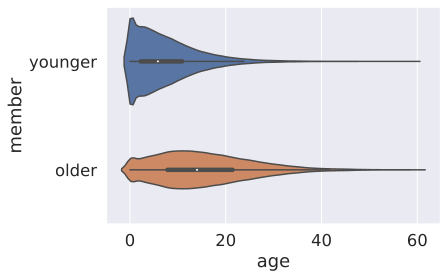

In [197]:
violin_age(ll_ages_s)

age1= 7.823558067030403
age2= 15.264003841452778


<ipython-input-181-a03a2ee11937>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))
<ipython-input-181-a03a2ee11937>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_=df_.append(pd.DataFrame(data_))


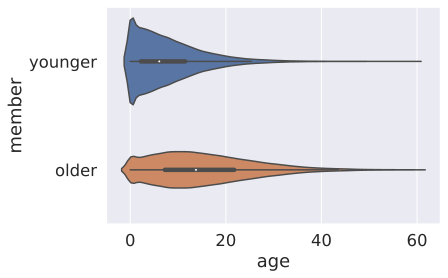

In [198]:
violin_age(ll_ages_ns)

## Fig 2: number of nature / science papers per team
disciplinewise

In [150]:
path_career='/mnt/sdb1/sandeep/openalex_ACTIV/'
with open(path_career+'works_nature_science.pkl', 'rb') as f:
    works_nature_science=pickle.load(f)
with open(path_career+'works_nature_others.pkl', 'rb') as f:
    works_nature_others=pickle.load(f) 

In [152]:
nature_venues=list(works_nature_others.keys())

In [153]:
headers = {
    'User-Agent': 'chowdhary_sandeep',
    'From': 'chowdhary_sandeep@phd.ceu.edu'  # This is another valid field
}

In [154]:
# nature_others_works

In [155]:
nature_others_works={}
for venue in works_nature_others.keys():
    url='https://api.openalex.org/journals/'+venue;response = requests.get(url, headers=headers)
    x= response.json();print(x['display_name'])
    nature_others_works[venue]=[works_nature_others[venue][x]['id'].split('/')[3] for x in range(len(works_nature_others[venue]))]


Nature Communications
Nature Genetics
Nature Medicine
Nature Biotechnology
Nature Materials
Nature Neuroscience
Nature Methods
Nature Immunology
Nature Nanotechnology
Nature Reviews Cancer
Nature Cell Biology
Nature Reviews Neuroscience
Nature Reviews Immunology
Nature Protocols
Nature Reviews Genetics
Nature Photonics
Nature Reviews Molecular Cell Biology
Nature Physics
Nature Structural & Molecular Biology
Nature Reviews Microbiology
Nature Chemistry
Nature Reviews Drug Discovery
Nature Geoscience
Nature Chemical Biology


In [156]:
dict_in_nature={}
set_ups=set(ups)
set_upns=set(upns)
for venue in works_nature_others.keys():
    upns_not_in_ups=set_upns.difference(set_ups)
    dict_in_nature[venue]=(len(set(nature_others_works[venue]) & set_ups)/len(set_ups))/(len(set(nature_others_works[venue]) & set_upns)/len(upns_not_in_ups))
    print('persistent:',len(set(nature_others_works[venue]) & set_ups)/len(ups))
    print('non-persistent:',len(set(nature_others_works[venue]) & upns_not_in_ups)/len(upns_not_in_ups))

persistent: 0.0006452223333593065
non-persistent: 0.0005945188816000808
persistent: 5.188016913332687e-05
non-persistent: 0.00012262155758729042
persistent: 6.837846046691357e-05
non-persistent: 0.00011805586129414662
persistent: 4.094756644239592e-05
non-persistent: 0.00010370653008712327
persistent: 8.606939936678365e-05
non-persistent: 6.489811159540104e-05
persistent: 5.645198480407981e-05
non-persistent: 0.00012229543642349442
persistent: 2.782844321327878e-05
non-persistent: 6.163689995744119e-05
persistent: 3.0611287534606655e-05
non-persistent: 8.12041697852003e-05
persistent: 5.545811183217699e-05
non-persistent: 3.94606608193142e-05
persistent: 2.0076234032436834e-05
non-persistent: 3.456884336237442e-05
persistent: 2.1666430787481336e-05
non-persistent: 8.511762375075212e-05
persistent: 1.987745943805627e-05
non-persistent: 3.5221085689966394e-05
persistent: 1.9281135654914582e-05
non-persistent: 3.913453965551822e-05
persistent: 3.67732999604041e-05
non-persistent: 6.326750

([], [])

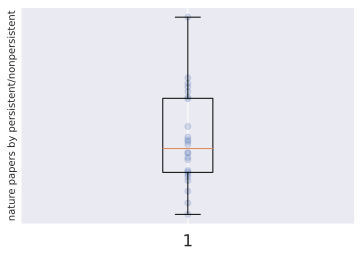

In [199]:
plt.plot([1 for it in range(24)],dict_in_nature.values(),'o',alpha=.2)
plt.boxplot(dict_in_nature.values())
plt.ylabel('nature papers by persistent/nonpersistent',fontsize=10)
plt.yticks([])




### Time to win first nature paper. 

## Fig 3: displinary variation in core
    - requirements:
        a) {auth: discipline scores} (threshold .75), a dictionary
            - download table from bigquery, filter by threshold, groupby author, make dictionary
            
        b) add scores to each core, a column in significant_cores_sample and nonsingi...


In [200]:
start_time = timeit.default_timer()
names=path_data+'openalex_ACTIV/auth_concepts/a*'
files=sorted(glob.glob(names))

p=Pool(processes=5)
df_disciplines = pd.concat(p.map(pd.read_csv,files),ignore_index=True)
print(toc(start_time))
p.close()

24.68164100125432
None


In [8]:
df_disciplines0=df_disciplines[df_disciplines['clevel']==0]

In [ ]:
# aid=np.array(df_disciplines0['auth_id'])
# cid=list(df_disciplines0['cid'])
# ind=np.where(aid[0:len(aid)-1]!=aid[1:len(aid)])[0]

# dict_aconc={}
# ind=np.insert(ind,0,-1)
# ind=np.insert(ind,len(ind),len(aid))
# for itc in range(len(ind)-1):
#     print(itc/len(ind),end='\r')
#     dict_aconc[aid[ind[itc]+1]]=cid[ind[itc]+1:ind[itc+1]+1]
    


In [13]:
# dict_aconc['https://openalex.org/A2106175861']

In [ ]:
# for core in cores_:
#     print(core)
#     print([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
#     break

In [20]:
cores_=np.array(significant_cores3_sample['group'])
it=0
sig_disp=[]
for core in cores_:
    it+=1
    sig_disp.append([dict_aconc[x] if x in dict_aconc.keys() else -1 for x in core])
    print(it/len(cores_),end='\r')
    

In [21]:
significant_cores3_sample.head()

,group,pvalue,w,fdr,ni,N,papers_shared
107,"(https://openalex.org/A2106175861, https://ope...",5.611704e-180,20,True,"(21, 32, 26, 31, 20, 24, 24, 31, 29)",396,"[W1991604864, W1594884475, W1531537719, W15280..."
299,"(https://openalex.org/A1763957276, https://ope...",3.051776e-222,16,True,"(108, 99, 115, 52, 51, 88, 81, 50, 45)",5203,"[W561035096, W589855545, W566292719, W36291422..."
317,"(https://openalex.org/A2020393399, https://ope...",0.000000e+00,29,True,"(50, 50, 152, 124, 48, 51, 38, 57, 30)",11642,"[W2504314658, W2501537110, W2489679359, W24929..."
331,"(https://openalex.org/A2118747090, https://ope...",8.145376e-299,20,True,"(25, 53, 23, 28, 21, 24, 50, 21, 46)",2586,"[W3179902792, W3182511914, W3182550861, W31780..."
367,"(https://openalex.org/A2064049883, https://ope...",8.190394e-226,31,True,"(31, 31, 31, 31, 31, 31, 31, 31, 31)",279,"[W2099856131, W1893874433, W2111156550, W21720..."


In [23]:
# sig_disp

## Fig 4: non-core members 
    - experts?
    - new first-time authors? what is the major channel (core teams or non-core) via which new authorsare included in academia?
    - first author?
    - qualifications? distance from cores expertise
    

- Age distribution of non-core members. 

- fraction of paper with core team, non-core team
- h-index of the author (correlate)

success meastric for each author

# basic 
for each paper,  fraction of non-core members
for each author, how many cores is she part of?
    - how overlapping are these cores?


# Idea
## Measure of success of a team
    - within discipline c5, outside discipline c5
    - 
    - are persistent teams forming the core of the collabroations network of the discipline
disciplinary separations: entropy of cores:  dsicpline

In [ ]:
succ